In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
idx_tickers = ["^IXIC", "^N225", "000001.SS", "^FTSE", "^AXJO", "^HSI", "^STI", "^NSEI", "^MXX", "PSEI.PS", "IDX", "^SET.BK", "^KLSE"]
indexes = yf.download(idx_tickers, end='2020-03-01')['Adj Close']
indexes = indexes.dropna()
indexes

[*********************100%***********************]  13 of 13 completed


,000001.SS,IDX,PSEI.PS,^AXJO,^FTSE,^HSI,^IXIC,^KLSE,^MXX,^N225,^NSEI,^SET.BK,^STI
Date,,,,,,,,,,,,,
2009-01-20,1994.107056,6.282875,1897.442139,3476.600098,4091.399902,12959.769531,1440.859985,880.369995,19213.019531,8065.790039,2796.600098,433.190002,1723.369995
2009-01-21,1985.015991,6.282875,1839.646973,3442.800049,4059.899902,12583.629883,1507.069946,873.409973,19497.099609,7901.640137,2706.149902,431.230011,1704.520020
2009-01-22,2004.951050,6.391797,1863.041016,3486.800049,4052.199951,12657.990234,1465.489990,879.020020,19306.730469,8051.740234,2713.800049,438.269989,1708.770020
2009-01-23,1990.656982,6.601668,1856.862549,3342.699951,4052.500000,12578.599609,1477.290039,872.690002,19348.810547,7745.250000,2678.550049,433.519989,1685.229980
2009-02-03,2060.808105,6.176610,1825.660522,3508.699951,4164.500000,12776.889648,1516.300049,879.669983,19630.460938,7825.509766,2783.899902,430.690002,1711.920044
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-19,2975.402100,20.811619,7395.038574,7144.600098,7457.000000,27655.810547,9817.179688,1534.160034,44901.500000,23400.699219,12125.900391,1505.540039,3213.709961
2020-02-20,3030.154053,20.607203,7411.094238,7162.500000,7436.600098,27609.160156,9750.969727,1534.979980,44774.539062,23479.150391,12080.849609,1491.239990,3198.679932
2020-02-26,2987.928955,19.448837,6908.063477,6708.100098,7042.500000,26696.490234,8980.780273,1495.189941,42737.281250,22426.189453,11678.500000,1366.410034,3117.520020


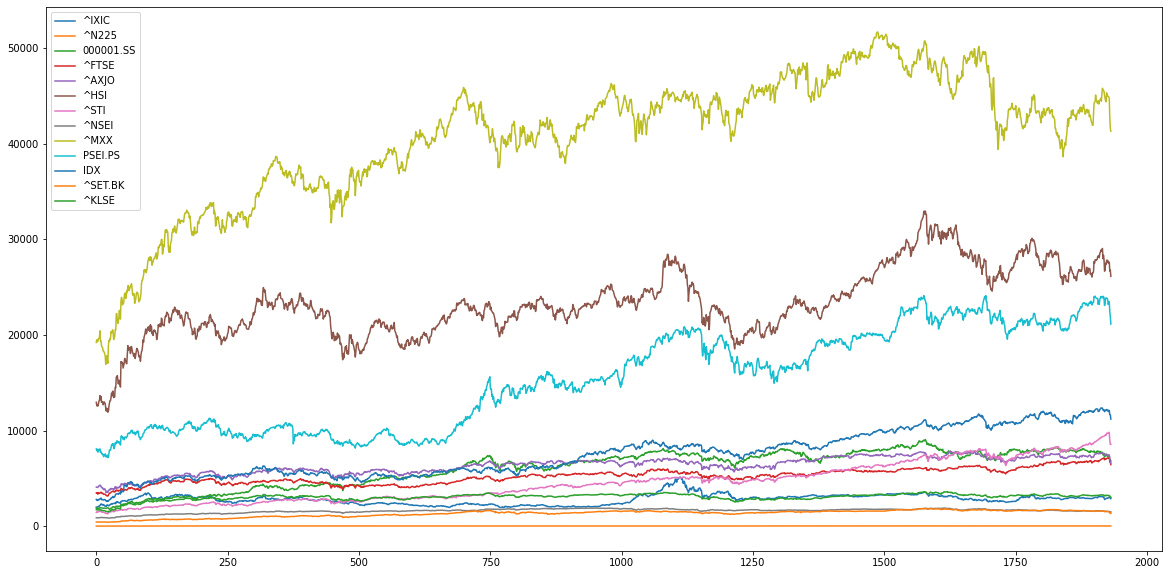

In [3]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(indexes.to_numpy(), label=idx_tickers)
plt.legend(loc="upper left")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(indexes, test_size=0.15, shuffle=False)

# normalize train and test data based off of std deviation and mean of the train set


In [6]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit()
print(tscv)

i = 0
for train_index, test_index in tscv.split(indexes):
    X_train, X_test = indexes.iloc[train_index.tolist()], indexes.iloc[test_index.tolist()]
    normalized_X_train = (X_train - X_train.mean()) / X_train.std()
    normalized_X_test = (X_test - X_train.mean()) / X_train.std()
    i = i+1
    normalized_X_train.to_csv("./cross_validated_data/idx_train" + str(i) + ".csv", index=False)
    normalized_X_test.to_csv("./cross_validated_data/idx_test" + str(i) + ".csv", index=False)




TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


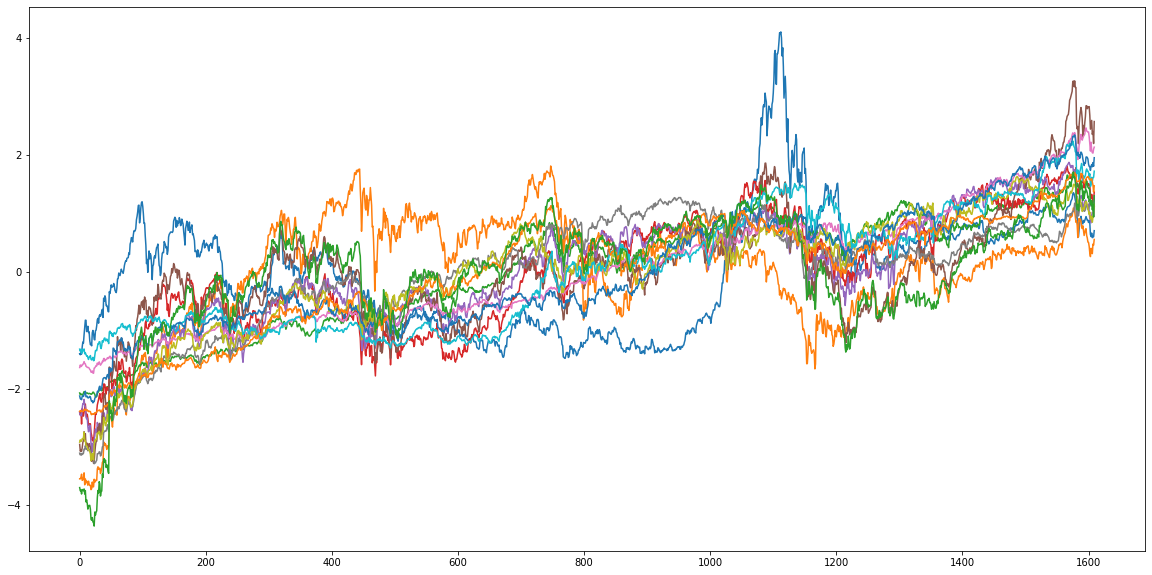

In [7]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(normalized_X_train.to_numpy())
plt.show()

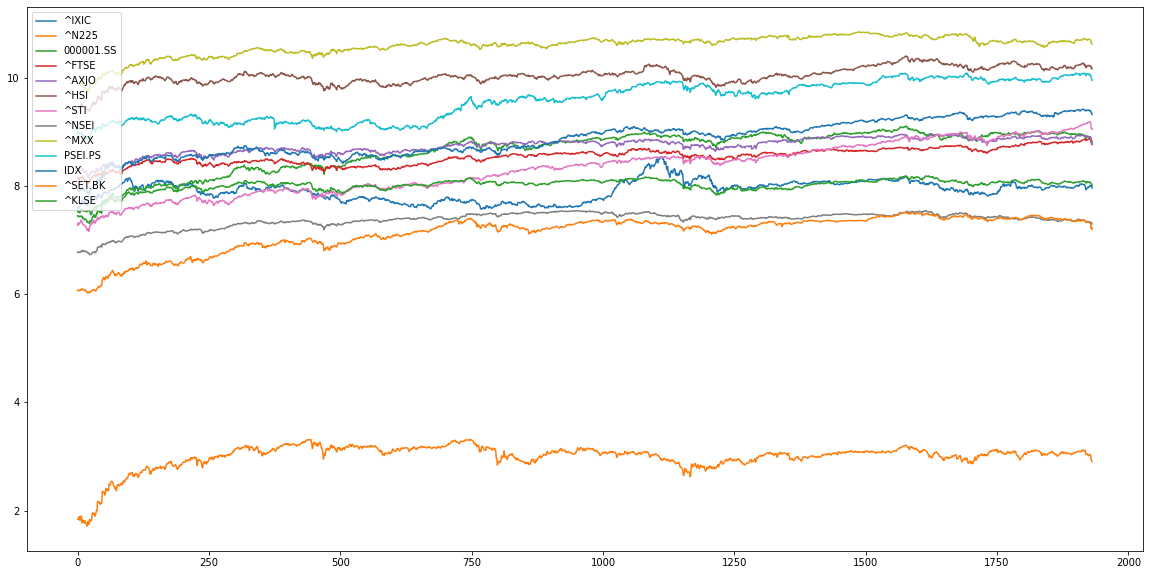

In [8]:
# log distributed data

idx_log = np.log(indexes)

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(idx_log.to_numpy(), label=idx_tickers)
plt.legend(loc="upper left")
plt.show()

In [10]:


X_train_log, X_test_log = train_test_split(idx_log, test_size=0.15, shuffle=False)

# normalize train and test data based off of std deviation and mean of the train set
normalized_X_train_log = (X_train_log - X_train_log.mean()) / X_train_log.std()
normalized_X_test_log = (X_test_log - X_train_log.mean()) / X_train_log.std()

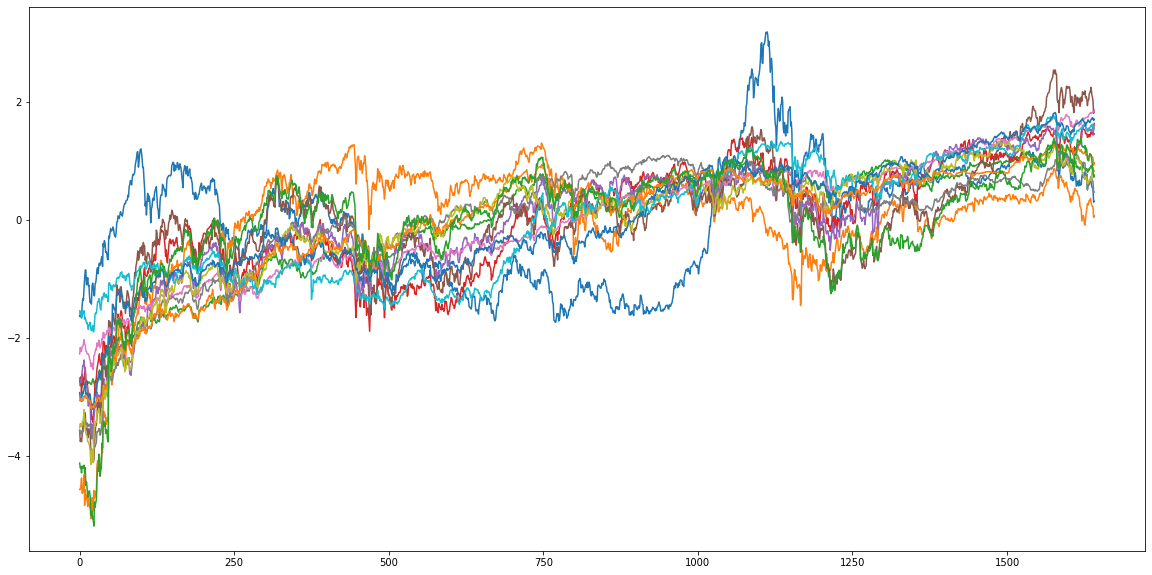

In [11]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(normalized_X_train_log.to_numpy())
plt.show()

In [12]:
normalized_X_train.to_csv('normalized_training_data.csv', index=False)
normalized_X_test.to_csv('normalized_test_data.csv', index=False)
normalized_X_train_log.to_csv('normalized_training_data_log.csv', index=False)
normalized_X_test_log.to_csv('normalized_test_data_log.csv', index=False)